In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('owid-covid-data_top10.csv')

In [5]:
df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    7663 non-null   object        
 1   continent                                   7663 non-null   object        
 2   location                                    7663 non-null   object        
 3   date                                        7663 non-null   datetime64[ns]
 4   total_cases                                 7663 non-null   float64       
 5   new_cases                                   7641 non-null   float64       
 6   new_cases_smoothed                          7484 non-null   float64       
 7   total_deaths                                7345 non-null   float64       
 8   new_deaths                                  7327 non-null   float64       
 9   new_deat

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7663,7.663000e+03,7.641000e+03,7484.000000,7345.000000,7327.000000,7173.000000,7663.000000,7641.000000,7484.000000,...,7663.000000,7663.000000,7.660000e+02,7663.000000,7663.000000,7663.000000,6.920000e+02,692.000000,692.000000,692.000000
mean,2021-02-15 06:53:02.356779264,7.413453e+06,3.248569e+04,32590.349244,143683.851464,420.451071,423.776663,40129.002883,218.335670,215.706487,...,17.022224,31.774449,5.955000e+01,5.882298,79.370521,0.867278,1.277382e+05,7.168382,10.014639,868.361431
min,2020-01-22 00:00:00,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.001000,0.000000,0.000000,...,1.900000,17.900000,5.955000e+01,0.530000,69.660000,0.645000,-3.772610e+04,-9.020000,-19.200000,-299.292834
25%,2020-08-08 00:00:00,2.297820e+05,1.333000e+03,1440.107250,10145.000000,23.000000,27.857000,2831.535000,12.022000,12.578000,...,10.100000,24.600000,5.955000e+01,2.540000,75.880000,0.824000,-1.335500e+02,-0.052500,-0.252500,-2.603051
50%,2021-02-15 00:00:00,2.702681e+06,9.921000e+03,11149.928500,83976.000000,161.000000,177.714000,17491.567000,62.362000,67.154500,...,19.800000,33.100000,5.955000e+01,5.980000,81.330000,0.916000,5.249990e+04,6.900000,5.745000,707.315534
75%,2021-08-26 00:00:00,7.906961e+06,3.357100e+04,35266.357250,149512.000000,535.500000,567.143000,64999.770000,209.744000,216.940500,...,23.400000,35.600000,5.955000e+01,8.050000,83.030000,0.926000,1.191370e+05,13.530000,14.987500,1517.147097
max,2022-03-05 00:00:00,7.926573e+07,1.368167e+06,802518.429000,958437.000000,4529.000000,4190.000000,342095.547000,7453.161000,5436.723000,...,30.100000,58.300000,5.955000e+01,13.050000,84.630000,0.947000,1.080748e+06,30.850000,107.250000,7406.847532
std,NaN,1.200763e+07,6.990790e+04,66130.926542,193260.956591,656.855964,611.463015,53182.233431,514.898513,475.288902,...,8.869313,11.113599,1.422014e-14,4.150498,4.790136,0.090695,2.181352e+05,7.737350,16.272627,1006.519309


In [7]:
# Instalar o openpyxl
!pip install openpyxl

import pandas as pd 

# Carregar os dados
df = pd.read_csv('owid-covid-data_top10.csv')

# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Selecionar a última data para cada país
df_latest = df.sort_values('date').groupby('location').tail(1)

# Selecionar colunas relevantes
relatorio_casos_mortes = df_latest[['location', 'total_cases', 'total_deaths']]

# Exportar para CSV
relatorio_casos_mortes.to_csv('relatorio_casos_mortes.csv', index=False)

# Exportar para Excel
relatorio_casos_mortes.to_excel('relatorio_casos_mortes.xlsx', index=False)

print("Relatório de Casos Totais e Mortes exportado com sucesso!")


Relatório de Casos Totais e Mortes exportado com sucesso!


In [8]:
# Calcular a taxa de mortalidade
df_latest['taxa_mortalidade'] = (df_latest['total_deaths'] / df_latest['total_cases']) * 100

# Selecionar colunas relevantes
relatorio_taxa_mortalidade = df_latest[['location', 'taxa_mortalidade']]

# Tratar possíveis divisões por zero ou valores NaN
relatorio_taxa_mortalidade = relatorio_taxa_mortalidade.replace([float('inf'), -float('inf')], None)
relatorio_taxa_mortalidade = relatorio_taxa_mortalidade.dropna()

# Exportar para CSV
relatorio_taxa_mortalidade.to_csv('relatorio_taxa_mortalidade.csv', index=False)

# Exportar para Excel
relatorio_taxa_mortalidade.to_excel('relatorio_taxa_mortalidade.xlsx', index=False)

print("Relatório da Taxa de Mortalidade exportado com sucesso!")


Relatório da Taxa de Mortalidade exportado com sucesso!


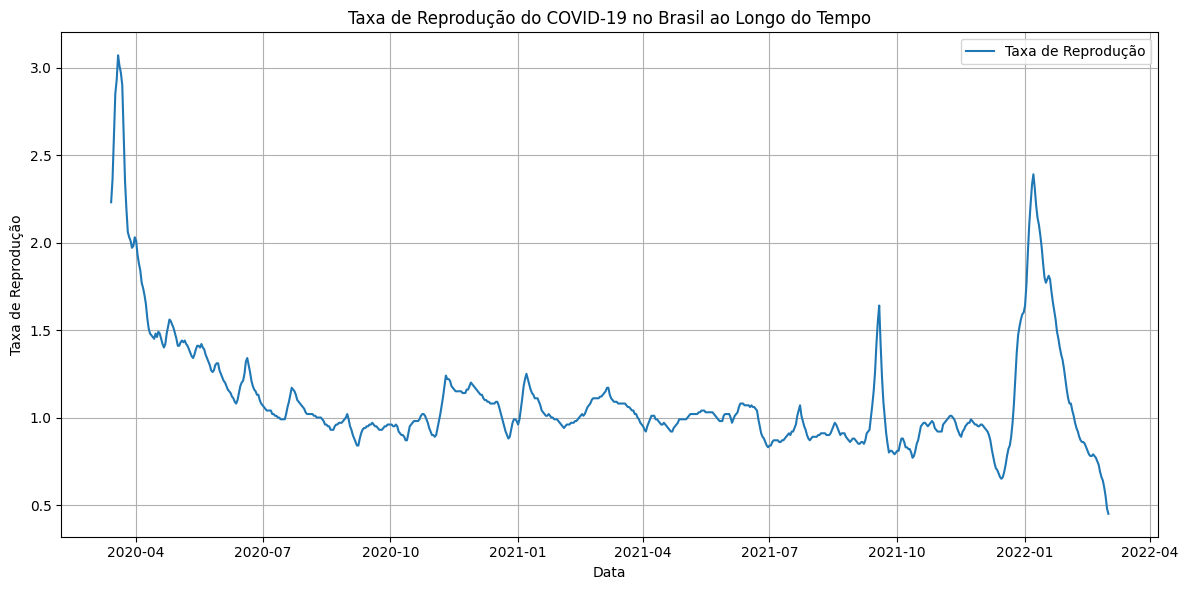

Gráfico da Taxa de Reprodução gerado e salvo com sucesso!


In [9]:
import matplotlib.pyplot as plt

# Filtrar dados para o Brasil
df_brasil = df[df['location'] == 'Brazil']

# Plotar a taxa de reprodução ao longo do tempo
plt.figure(figsize=(12,6))
plt.plot(df_brasil['date'], df_brasil['reproduction_rate'], label='Taxa de Reprodução')
plt.title('Taxa de Reprodução do COVID-19 no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Taxa de Reprodução')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_taxa_reproducao_brasil.png')  # Salvar o gráfico como imagem
plt.show()

print("Gráfico da Taxa de Reprodução gerado e salvo com sucesso!")


In [21]:
# Selecionar colunas relevantes de vacinação
relatorio_vacinacao = df_latest[['location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]

# Tratar valores ausentes
relatorio_vacinacao = relatorio_vacinacao.fillna(0)

# Exportar para CSV
relatorio_vacinacao.to_csv('relatorio_vacinacao.csv', index=False)

# Exportar para Excel
relatorio_vacinacao.to_excel('relatorio_vacinacao.xlsx', index=False)

print("Relatório de Taxas de Vacinação exportado com sucesso!")


Relatório de Taxas de Vacinação exportado com sucesso!


In [20]:
# Selecionar a última data para cada país (já feito anteriormente em df_latest)

# Selecionar colunas relevantes
relatorio_saude = df_latest[['location', 'icu_patients_per_million', 'hosp_patients_per_million']]

# Tratar valores ausentes
relatorio_saude = relatorio_saude.fillna(0)

# Exportar para CSV
relatorio_saude.to_csv('relatorio_capacidade_saude.csv', index=False)

# Exportar para Excel
relatorio_saude.to_excel('relatorio_capacidade_saude.xlsx', index=False)

print("Relatório de Capacidade de Saúde exportado com sucesso!")


Relatório de Capacidade de Saúde exportado com sucesso!


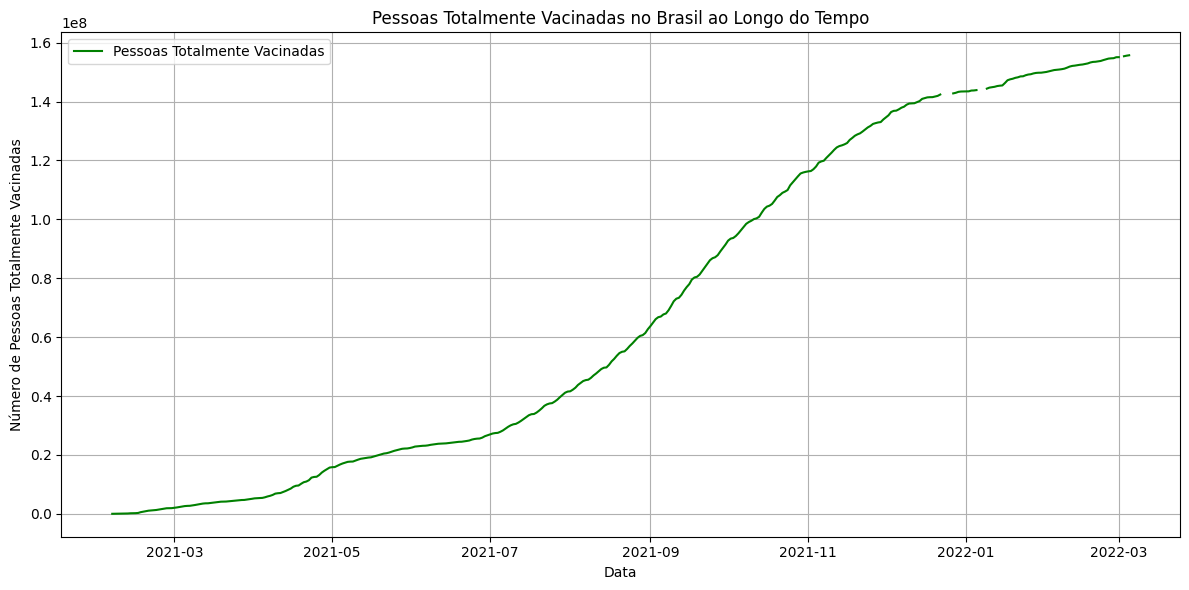

Gráfico de Pessoas Totalmente Vacinadas no Brasil gerado e salvo com sucesso!


In [17]:
# Plotar pessoas totalmente vacinadas ao longo do tempo
plt.figure(figsize=(12,6))
plt.plot(df_brasil['date'], df_brasil['people_fully_vaccinated'], label='Pessoas Totalmente Vacinadas', color='green')
plt.title('Pessoas Totalmente Vacinadas no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pessoas Totalmente Vacinadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_pessoas_totalmente_vacinadas_brasil.png')
plt.show()

print("Gráfico de Pessoas Totalmente Vacinadas no Brasil gerado e salvo com sucesso!")


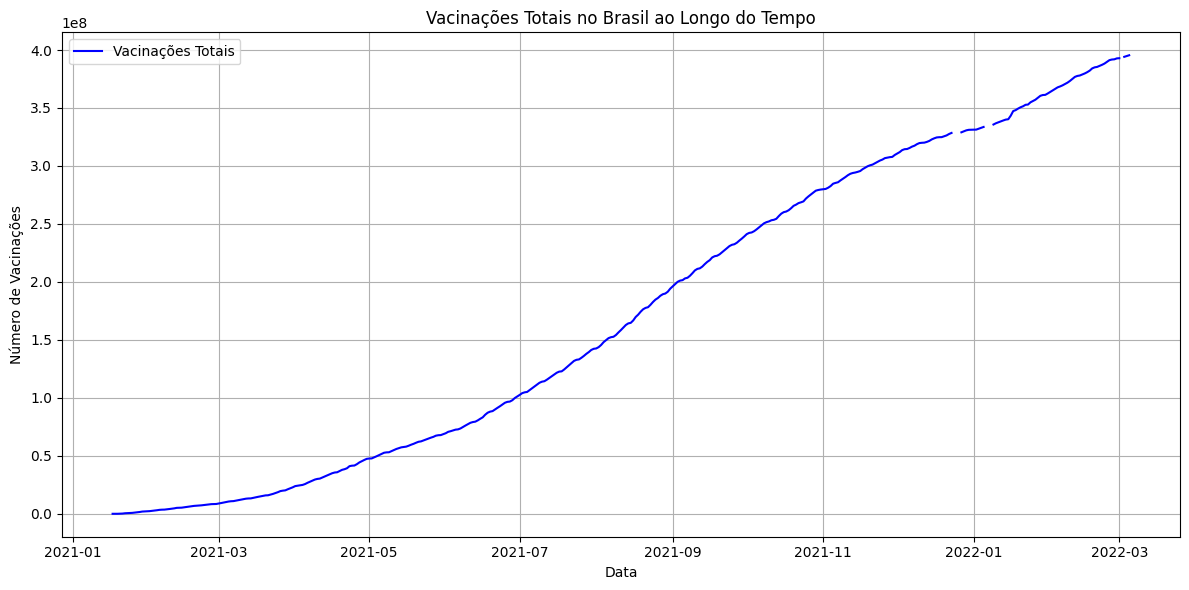

Gráfico de Vacinações Totais no Brasil gerado e salvo com sucesso!


In [22]:
import matplotlib.pyplot as plt

# Filtrar dados para o Brasil
df_brasil = df[df['location'] == 'Brazil']

# Plotar vacinações totais ao longo do tempo
plt.figure(figsize=(12,6))
plt.plot(df_brasil['date'], df_brasil['total_vaccinations'], label='Vacinações Totais', color='blue')
plt.title('Vacinações Totais no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Vacinações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_vacinacoes_totais_brasil.png')  # Salvar o gráfico como imagem
plt.show()

print("Gráfico de Vacinações Totais no Brasil gerado e salvo com sucesso!")


In [12]:
# Selecionar colunas relevantes
relatorio_testes = df_latest[['location', 'total_tests', 'new_tests', 'positive_rate']]

# Tratar valores ausentes
relatorio_testes = relatorio_testes.fillna(0)

# Exportar para CSV
relatorio_testes.to_csv('relatorio_testes.csv', index=False)

# Exportar para Excel
relatorio_testes.to_excel('relatorio_testes.xlsx', index=False)

print("Relatório de Testes Realizado exportado com sucesso!")


Relatório de Testes Realizado exportado com sucesso!


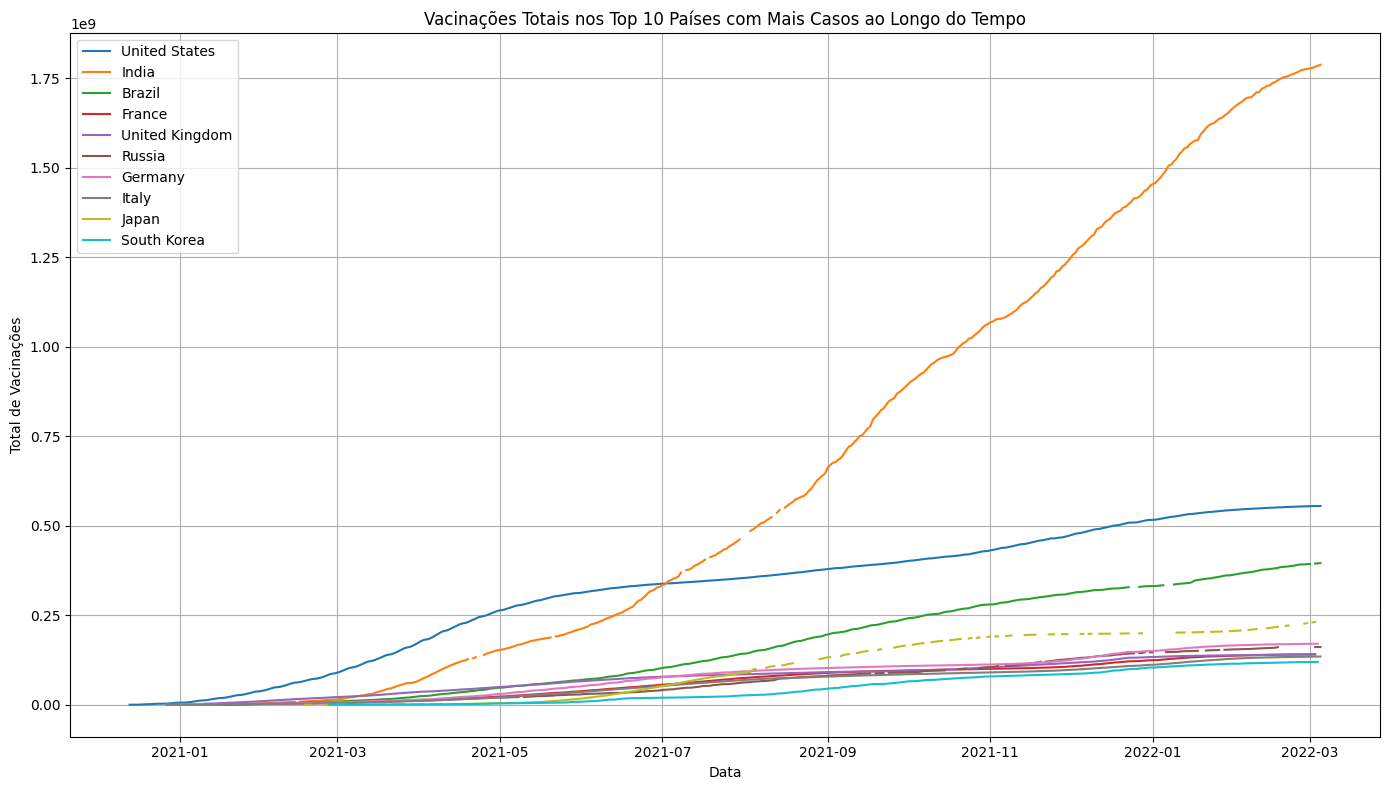

Gráfico de Vacinações Totais nos Top 10 Países gerado e salvo com sucesso!


In [23]:
# Selecionar os top 10 países com mais casos
top10_paises = df_latest.sort_values('total_cases', ascending=False).head(10)['location'].tolist()

# Filtrar os dados para esses países
df_top10 = df[df['location'].isin(top10_paises)]

# Pivotar o dataframe para facilitar a plotagem
pivot_vacinacoes = df_top10.pivot_table(values='total_vaccinations', index='date', columns='location')

# Plotar o gráfico
plt.figure(figsize=(14,8))
for pais in top10_paises:
    plt.plot(pivot_vacinacoes.index, pivot_vacinacoes[pais], label=pais)

plt.title('Vacinações Totais nos Top 10 Países com Mais Casos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vacinações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_vacinacoes_top10.png')
plt.show()

print("Gráfico de Vacinações Totais nos Top 10 Países gerado e salvo com sucesso!")


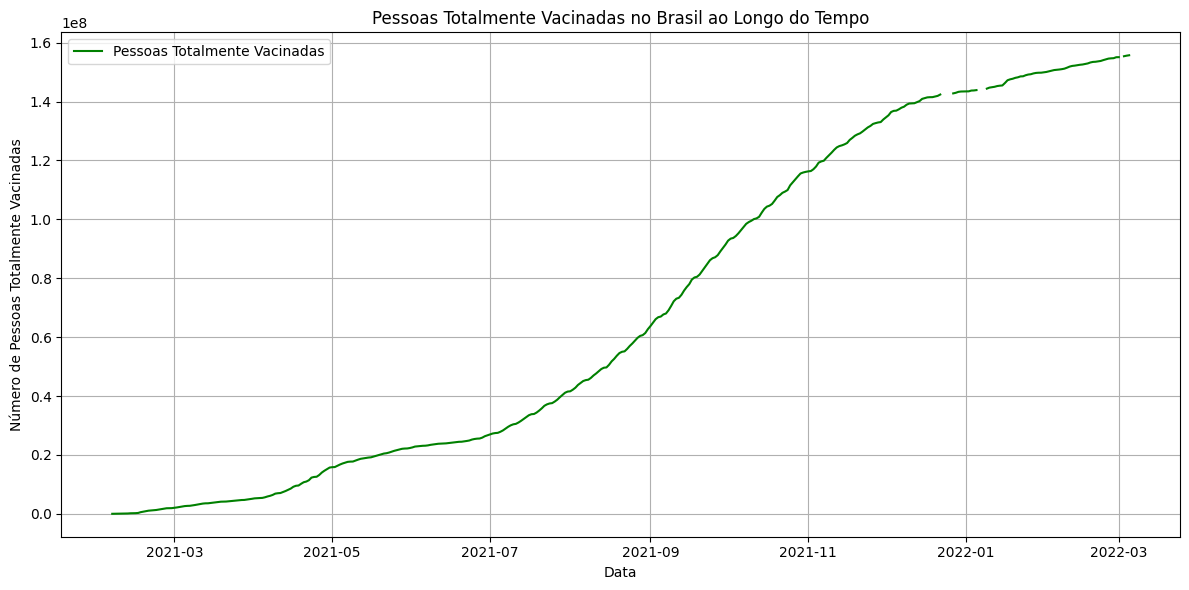

Gráfico de Pessoas Totalmente Vacinadas no Brasil gerado e salvo com sucesso!


In [24]:
# Plotar pessoas totalmente vacinadas ao longo do tempo
plt.figure(figsize=(12,6))
plt.plot(df_brasil['date'], df_brasil['people_fully_vaccinated'], label='Pessoas Totalmente Vacinadas', color='green')
plt.title('Pessoas Totalmente Vacinadas no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pessoas Totalmente Vacinadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_pessoas_totalmente_vacinadas_brasil.png')
plt.show()

print("Gráfico de Pessoas Totalmente Vacinadas no Brasil gerado e salvo com sucesso!")


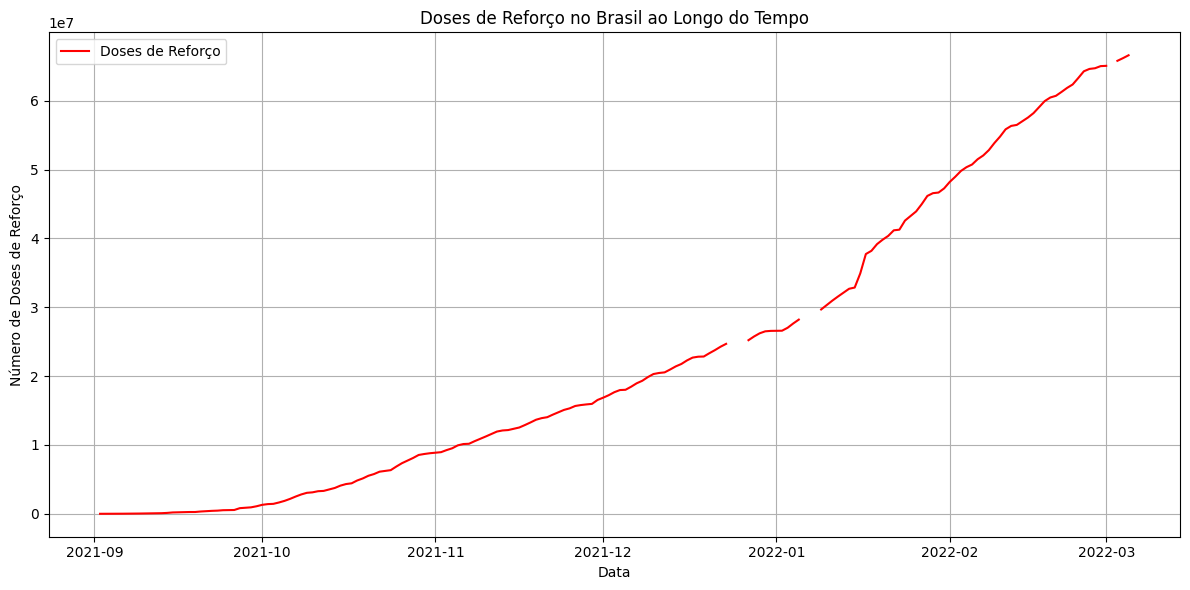

Gráfico de Doses de Reforço no Brasil gerado e salvo com sucesso!


In [18]:
# Plotar doses de reforço (boosters) ao longo do tempo
plt.figure(figsize=(12,6))
plt.plot(df_brasil['date'], df_brasil['total_boosters'], label='Doses de Reforço', color='red')
plt.title('Doses de Reforço no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Doses de Reforço')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_doses_reforco_brasil.png')
plt.show()

print("Gráfico de Doses de Reforço no Brasil gerado e salvo com sucesso!")


In [13]:
# Selecionar colunas relevantes
relatorio_demografico = df_latest[['location', 'population_density', 'gdp_per_capita', 'life_expectancy', 'total_cases', 'total_deaths']]

# Tratar valores ausentes
relatorio_demografico = relatorio_demografico.fillna(0)

# Exportar para CSV
relatorio_demografico.to_csv('relatorio_demografico_economico.csv', index=False)

# Exportar para Excel
relatorio_demografico.to_excel('relatorio_demografico_economico.xlsx', index=False)

print("Relatório de Indicadores Demográficos e Econômicos exportado com sucesso!")


Relatório de Indicadores Demográficos e Econômicos exportado com sucesso!


In [14]:
import os

# Criar uma pasta para os relatórios
pasta_relatorios = 'relatorios_covid'
if not os.path.exists(pasta_relatorios):
    os.makedirs(pasta_relatorios)

# Função para mover arquivos para a pasta de relatórios
def mover_para_pasta(nome_arquivo):
    os.rename(nome_arquivo, os.path.join(pasta_relatorios, nome_arquivo))

# Listagem dos relatórios gerados anteriormente
arquivos_relatorios = [
    'relatorio_casos_mortes.csv',
    'relatorio_casos_mortes.xlsx',
    'relatorio_taxa_mortalidade.csv',
    'relatorio_taxa_mortalidade.xlsx',
    'relatorio_vacinacao.csv',
    'relatorio_vacinacao.xlsx',
    'relatorio_capacidade_saude.csv',
    'relatorio_capacidade_saude.xlsx',
    'relatorio_testes.csv',
    'relatorio_testes.xlsx',
    'relatorio_demografico_economico.csv',
    'relatorio_demografico_economico.xlsx'
]

# Mover cada relatório para a pasta
for arquivo in arquivos_relatorios:
    mover_para_pasta(arquivo)

print(f"Todos os relatórios foram movidos para a pasta '{pasta_relatorios}'.")


Todos os relatórios foram movidos para a pasta 'relatorios_covid'.
